<a href="https://colab.research.google.com/github/DimitriBolt/Social-processes/blob/main/StochasticModellingOfSocialProcesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Research: Applicability (or Inapplicability) of Basic Statistical Approaches for Describing Social Processes
=======
<p align='right'><i>"All science is either well-known physics or deep research the real world."</i>  
— Echo of Ernest Rutherford</p>

---

# Research Goal:  
To prove or disprove that the characteristics of economic agents are random variables and cannot be effectively modeled or predicted.

In the words of the Math:
Dimitri Bolt aims to determine whether social processes constitute sets to which the framework of modern probability theory can be applied. Specifically, it remains unclear whether these processes satisfy the **Kolmogorov axioms**. By engaging in mathematical statistics, Dimitri Bolt seeks to draw conclusions about the applicability of Kolmogorov’s axiomatic system based on observed samples drawn from such sets.

<font color='yellow'>*TODO*</font>: use this https://en.wikipedia.org/wiki/Empirical_distribution_function

---

# 1. Experimental Data  
I developed software that collects data about economic agents in under a minute. For the purposes of this research, I propose focusing on a dataset of **10,000 American companies**, as presented in formats like this Yahoo Finance page:  
https://finance.yahoo.com/quote/MSFT/

Approximately **95% of the effort** in this research was spent developing this data collection tool. It's worth noting that companies like Bloomberg offer similar data, but real-time subscriptions cost around **$50,000/month**, which is not feasible for academic research.

From a mathematical point of view, the market can be considered as an object:
$$
\vec{M}(t) = \begin{bmatrix}
p_1(t) \\
p_2(t) \\
\vdots \\
p_n(t)
\end{bmatrix}, \quad n \approx 10,000
$$

where each function $p_i(t)$ represents the time series (e.g., price, profit) of an economic agent.

This implies $\vec{M}(t) \in \mathbb{R}^{10,000}$.

As a **zero-order assumption**, we treat all economic agents as independent—i.e., all dimensions are equally important and unrelated.

## Techcal section for connectig with main data collection software.

Shouls be hide.

In [23]:
# Techical code chank for connection with main data collection software.
!pip install oracledb
import oracledb
from pandas import DataFrame
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Using statsmodels for efficient ACF calculation
from google.colab import drive;
# drive.mount ('/content/drive');
# !ls -list /content/sample_data/admin/

connection = oracledb.connect(
        # config_dir="/content/drive/MyDrive/Statistics/admin/",
        config_dir="/content/sample_data/admin/",
        user="ADMIN",
        password="Db123456!@#$%^",
        dsn="yahooprices_high",
        # wallet_location="/content/drive/MyDrive/Statistics/admin/",
        wallet_location="/content/sample_data/admin/",
        wallet_password="Db123456!")

# The example for 9 of 10,000 tikers.
with connection.cursor() as cursor:
  cursor.execute("""
  SELECT TRUNC(date'1970-01-01' + (timestamp / 86400)) as time,
    symbol,
    ADJCLOSE
  FROM Commodities
  WHERE date'1970-01-01'+ (timestamp / 86400) < CURRENT_DATE - 1
  """)
  col_names = [c.name for c in cursor.description]
  data: list = cursor.fetchall()
df: DataFrame = pandas.DataFrame(data, columns=col_names)
# df = df.dropna()
indeces: DataFrame = df.pivot_table(values='ADJCLOSE', index='TIME', columns='SYMBOL', aggfunc='mean')

# Stock prices of telecommunication companies.
with connection.cursor() as cursor:
  cursor.execute("""
  SELECT TRUNC(date'1970-01-01' + (timestamp / 86400)) as time,
    symbol,
    ADJCLOSE
  FROM Technology
  WHERE date'1970-01-01'+ (timestamp / 86400) < CURRENT_DATE - 1
  """)
  col_names = [c.name for c in cursor.description]
  data: list = cursor.fetchall()
df: DataFrame = pandas.DataFrame(data, columns=col_names)
# df = df.dropna()
tech: DataFrame = df.pivot_table(values='ADJCLOSE', index='TIME', columns='SYMBOL', aggfunc='mean')



## Visualization
Below in this section are examples of the format and visualizations of the analyzed data.

In [24]:
# @title
display(tech)

SYMBOL,AAPL,ADBE,ADI,ADP,ADSK,AMAT,AMD,ANSS,APH,APP,...,VEEV,VRSK,VRSN,VRT,WDAY,WIT,XYZ,YMM,ZM,ZS
TIME,,,,,,,,,,,,,,,,,,,,,
2022-05-09,149.85522,376.91,144.25876,196.90422,186.32,102.960400,86.36,249.17,33.536068,30.20,...,166.12,174.63255,164.86,11.127221,176.21,3.000941,83.86,5.355028,92.34,153.09
2022-05-10,152.26973,393.03,147.07286,199.29759,186.41,104.352684,88.73,250.64,33.511795,28.99,...,164.74,175.50578,167.69,10.020482,183.67,3.045001,84.39,5.727722,90.68,150.29
2022-05-11,144.37587,379.33,144.01240,195.72159,180.68,101.178680,87.92,238.75,33.186590,27.28,...,160.06,171.11986,166.94,10.140130,173.14,2.942195,71.22,5.923877,84.80,136.57
2022-05-12,140.49297,388.49,144.86519,194.73611,185.05,103.943760,87.06,240.54,33.312782,36.74,...,164.15,170.39377,164.41,10.409336,171.92,3.045001,75.76,5.884646,84.97,137.63
2022-05-13,144.97702,405.45,150.40813,195.96565,197.07,108.909225,95.12,254.57,34.205925,39.46,...,172.78,172.89584,165.11,11.266810,182.29,3.010732,84.15,6.159263,94.84,153.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-01,213.32000,374.63,193.74000,298.69000,273.49,148.960000,96.65,319.73,78.630000,279.49,...,232.07,294.51000,279.70,92.550000,246.61,2.860000,58.48,11.310000,77.25,227.06
2025-05-02,205.35000,380.87,198.59000,303.57000,279.99,155.100000,98.80,328.76,80.660000,307.58,...,236.49,293.90000,284.09,95.000000,248.68,2.900000,46.53,11.850000,78.23,230.47
2025-05-05,198.89000,381.06,197.72000,303.96000,280.07,154.610000,100.59,324.89,80.170000,301.84,...,236.99,294.75000,284.55,94.830000,248.34,2.900000,46.64,11.840000,78.23,232.98


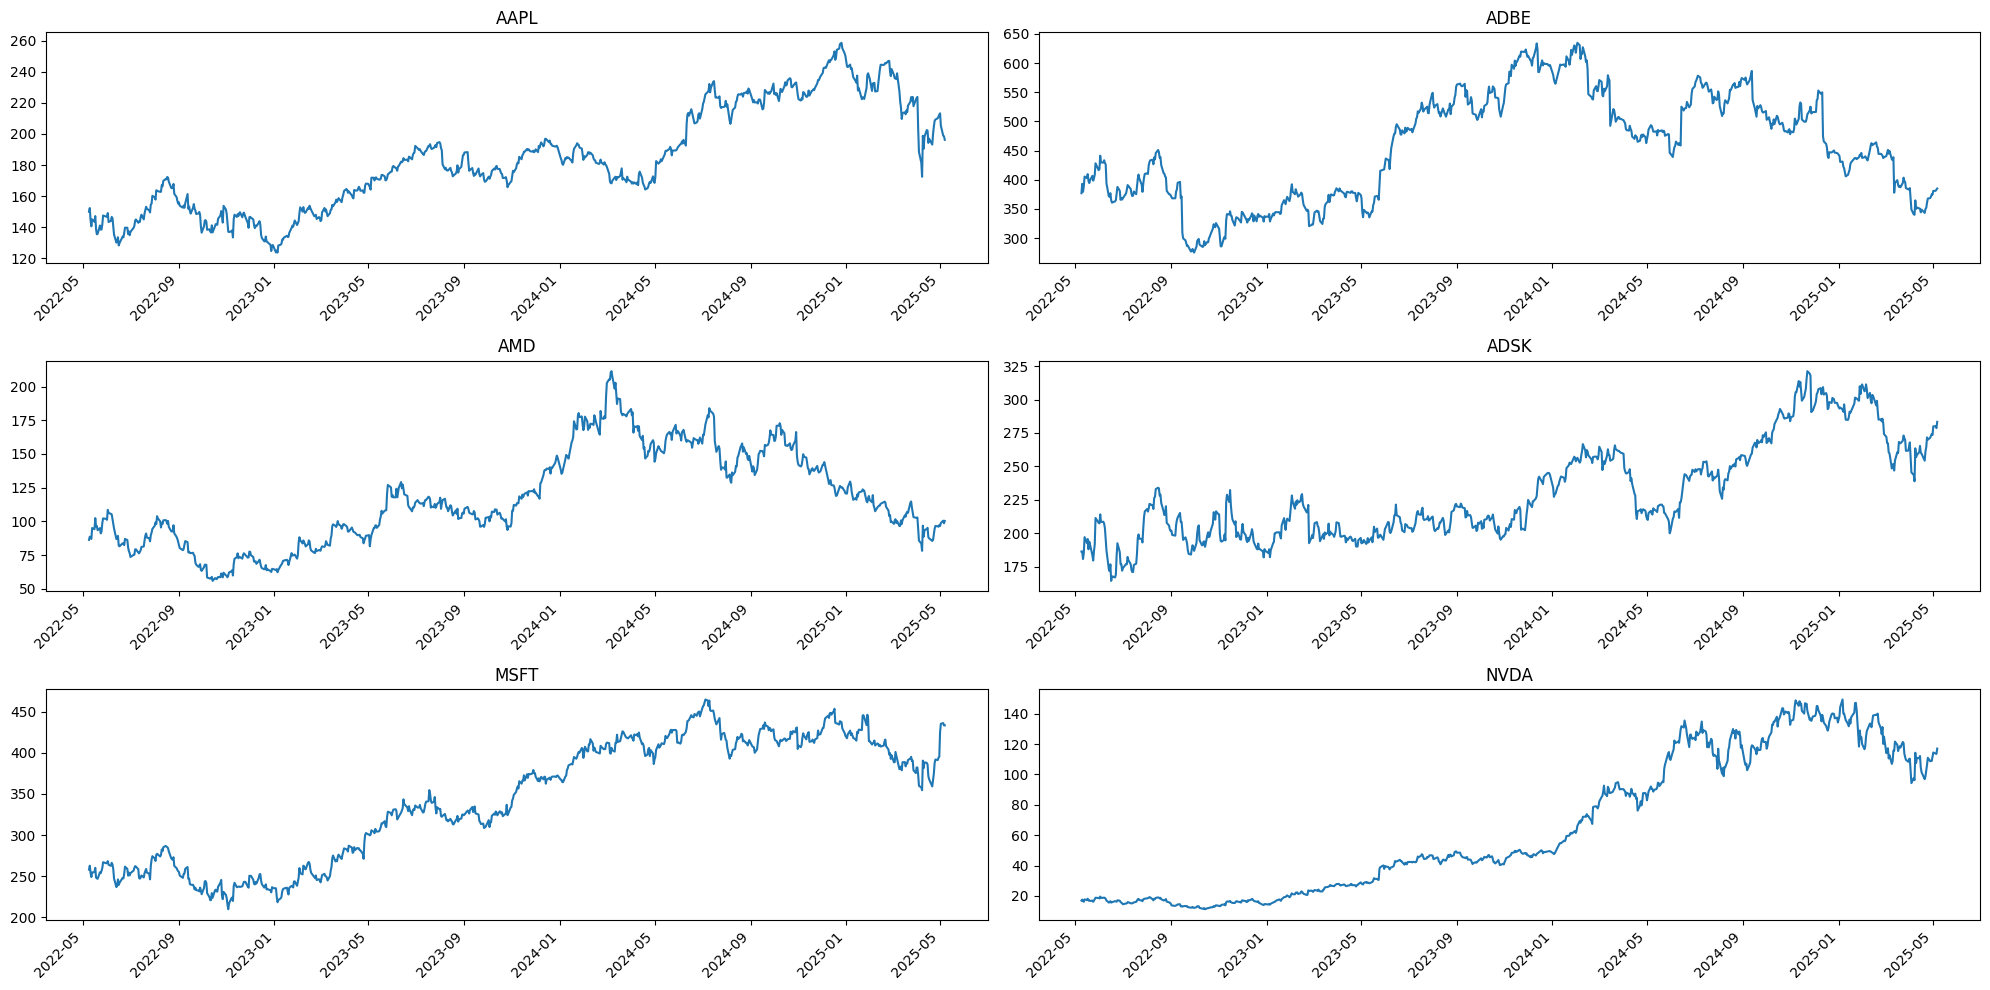

In [25]:
# @title
df = tech.copy()
selected_columns = ["AAPL", "ADBE", "AMD", "ADSK", "MSFT", "NVDA"]
# df = df[selected_columns]
plt.figure(figsize=(20, 10))                  # Adjust figure size as needed


# Get the number of columns (excluding 'TIME') for subplot layout
num_plots = len(df[selected_columns].columns)
num_rows = int(np.ceil(num_plots / 2))        # Calculate rows for 2 columns per row

# Loop through columns
for i, column in enumerate(df[selected_columns].columns):
    plt.subplot(num_rows, 2, i + 1)           # Create subplot in the grid
    plt.plot(df.index, df[column])            # Plot the data using df.index for x-axis
    plt.title(column)                         # Set subplot title to column name
    plt.xticks(rotation=45, ha='right')       # Rotate x-axis labels for readability

plt.tight_layout()                            # Adjust spacing between subplots
plt.show()

# 4. Detrending the Data  
As input data, may be to use:  
$$
M_i(t)_{detrended} = p_i(t) - T(t)_{trend}
$$
where $T(t)$ is a common trend.  
It is generally agreed that the *Dow Jones Industrial Average* can be used as $T(t)$.

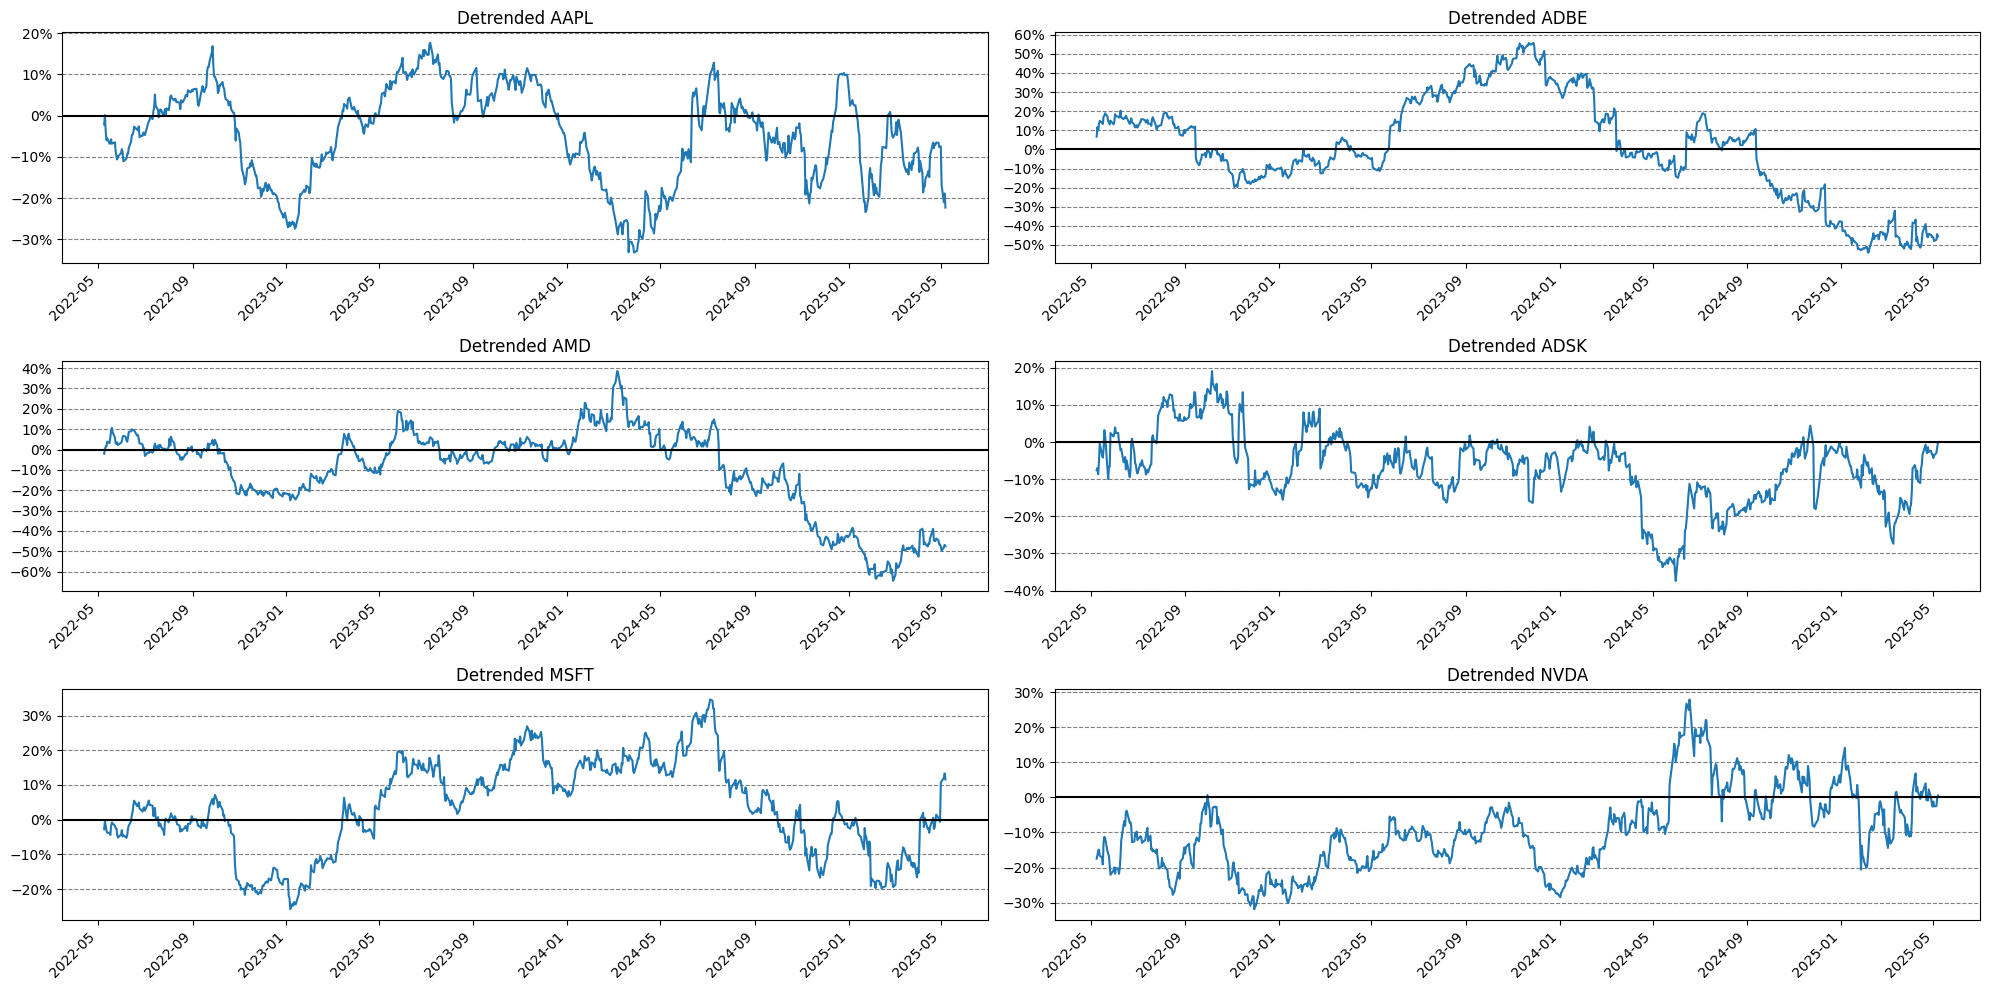

In [26]:
# Normalize all columns ftom
df_normalized = df.copy()
for column in df.columns:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Normalize trend.
trend = (indeces['^DJI'] - indeces['^DJI'].min()) / (indeces['^DJI'].max() - indeces['^DJI'].min())

# Create the detrended DataFrame.
df_detrending = df_normalized.copy()
for column in df_normalized.columns:
    df_detrending[column] = df_normalized[column] - trend

# Chart all columns of the detrended DataFrame
plt.figure(figsize=(20, 10))
num_plots = len(df_detrending[selected_columns].columns) - 1
num_rows = int(np.ceil(num_plots / 2))

import matplotlib.ticker as mtick           # Import for percentage formatting
for i, column in enumerate(df_detrending[selected_columns].columns):
  if True :
    plt.subplot(num_rows, 2, i + 1)
    plt.plot(df_detrending.index, df_detrending[column])
    plt.title(f"Detrended {column}")
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis as percentage

    # Add horizontal grid lines every 10%
    plt.grid(axis='y', which='major', linestyle='--', color='gray')
    plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(0.1))  # Set major ticks every 10%

    # Add main horizontal line at y=0
    plt.axhline(y=0, color='black', linestyle='-')


plt.tight_layout()
plt.show()


Also, the  *Standard and Poor's 500* can be used as $T(t)$.

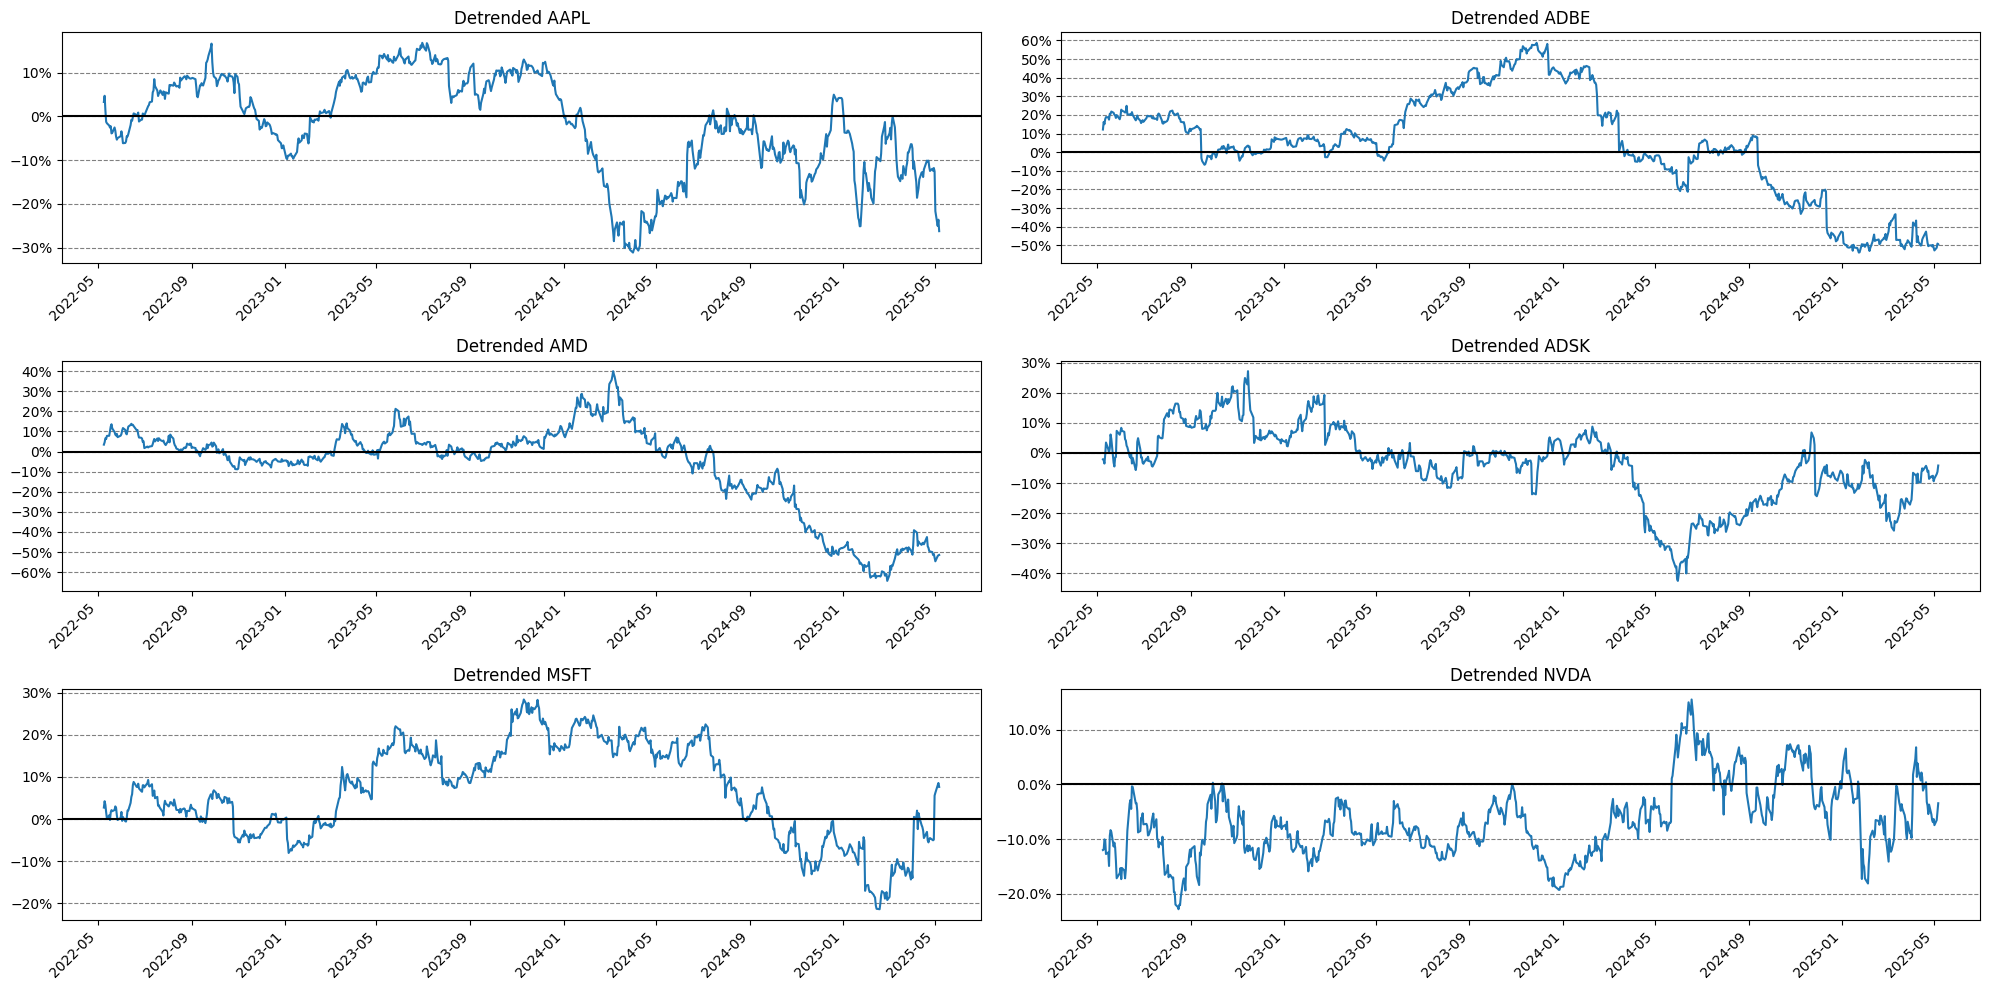

In [27]:
# Let normalizes trend be a Standard and Poor's 500.
trend = (indeces['^GSPC'] - indeces['^GSPC'].min()) / (indeces['^GSPC'].max() - indeces['^GSPC'].min())

# Create the detrended DataFrame
df_detrending = df_normalized.copy()
for column in df_normalized.columns:
    df_detrending[column] = df_normalized[column] - trend

# Chart all columns of the detrended DataFrame
plt.figure(figsize=(20, 10))
num_plots = len(df_detrending[selected_columns].columns) - 1
num_rows = int(np.ceil(num_plots / 2))

import matplotlib.ticker as mtick                                     # Import for percentage formatting
for i, column in enumerate(df_detrending[selected_columns].columns):
  if True:
    plt.subplot(num_rows, 2, i + 1)
    plt.plot(df_detrending.index, df_detrending[column])
    plt.title(f"Detrended {column}")
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Format y-axis as percentage

    # Add horizontal grid lines every 10%
    plt.grid(axis='y', which='major', linestyle='--', color='gray')
    plt.gca().yaxis.set_major_locator(mtick.MultipleLocator(0.1))     # Set major ticks every 10%

    # Add main horizontal line at y=0
    plt.axhline(y=0, color='black', linestyle='-')

plt.tight_layout()
plt.show()

# 2.  Calculating the Discrete Autocorrelation Function `G(k)` for a Time Series.

The first idea is to examine the **autocorrelation function** of the time series.

## 2.1  This function calculates the discrete analogue of the continuous autocorrelation function

$$G(τ) = \lim_{T\to\infty}\frac{1}{T}\int_{0}^{T} f(t-\tau)*f(t) \,dt$$
using the formula:

$$G(k) = \frac{1}{N} * \sum_{n=k}^{N-1} f(n-k)* f(n)$$

where $k$ is the lag in time steps.

In [28]:
def calculate_autocorrelation_G(df: pd.DataFrame,
                                value_column: str = "MSFT",
                                time_column: str = "TIME",
                                max_lag: int = None,
                                normalization: str = "biased") -> pd.Series:


    """
    Args:
        df (pd.DataFrame):        DataFrame containing the time series data. Must have columns specified by value_column and time_column.
        value_column (str):       The name of the column containing the time series values (f(t)). Defaults to "MSFT".
        time_column (str):        The name of the column containing the time stamps (t). Defaults to "TIME". Although not directly used in the standard statsmodels ACF calculation (which assumes sequential order), it's kept for consistency with the problem description.
        max_lag (int, optional):  The maximum lag (k) to compute the autocorrelation for. If None, it defaults to N-1, where N is the number of data points. Defaults to None.

    Returns:
        pd.Series: A pandas Series containing the autocorrelation values G(k), indexed by the lag k (from 0 to max_lag).

    """

    f_t = df[value_column].dropna()           # Extract the time series values from the DataFrame
    N = len(f_t)

    # Determine the number of lags for the ACF calculation
    if max_lag is None:
        nlags = N - 1
    else:
        nlags = min(max_lag, N - 1)  # Ensure max_lag doesn't exceed N-1

    f_values = f_t.values                     # Use numpy array for efficiency
    autocorr_G = np.zeros(nlags + 1)          # Array to store results for lags 0 to nlags

    for k in range(nlags + 1):
      # Sum f(n) * f(n-k) for n from k to N-1
      # f[k:] corresponds to f(n) for n=k...N-1
      # f[:N-k] corresponds to f(n-k) for n=k...N-1
      product_sum = np.sum(f_values[k:] * f_values[:N - k])
      if normalization == "unbiased":
        autocorr_G[k] = product_sum / (N - k)
      else:   # Default to "biased"
        autocorr_G[k] = product_sum / N

    # Create a pandas Series for the result
    lags = np.arange(nlags + 1)
    result_series = pd.Series(autocorr_G, index=lags, name="Autocorrelation_G")
    result_series.index.name = "Lag_k"

    return result_series

Calculating Autocorrelation G(k) for all possible lags (N-1):
- The normalization $\frac{1}{N}$ replaces $\frac{1}{T}$. This is a common definition (sometimes called the "biased" estimator).

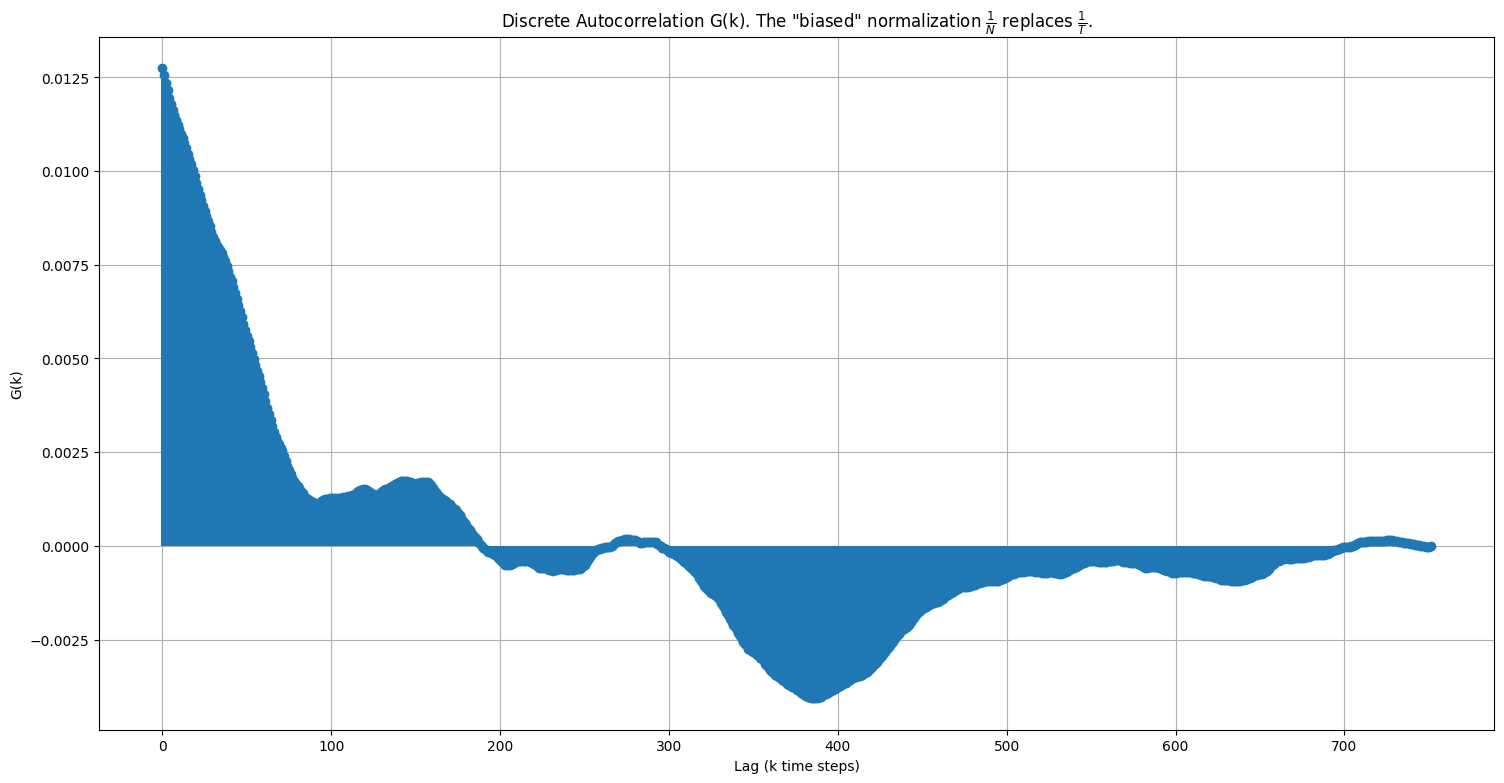

In [29]:
# --- Example with full lags ---
autocorr_full = calculate_autocorrelation_G(df=df_detrending, value_column="AAPL", normalization="biased")  # max_lag=None by default, changed value_column
# Plot the results
plt.figure(figsize=(18, 9))
plt.stem(autocorr_full.index, autocorr_full.values, basefmt=" ")
plt.xlabel("Lag (k time steps)")
plt.ylabel("G(k)")
plt.title(r'Discrete Autocorrelation G(k). The "biased" normalization $\frac{1}{N}$ replaces $\frac{1}{T}$.')
plt.grid(True)
plt.show()

## 2.2  About the  implemention the discrete equivalent of the autocorrelation function $G(τ)$.

The formula $G(τ) = \lim_{T\to\infty}\frac{1}{T}\int_{0}^{T} f(t-\tau)*f(t) \,dt$ is the definition for a continuous-time autocorrelation function.

Since my $f(t)$ is a discrete function (values from `df_detrending["AAPL"]` at specific times `df.index`), we need to use the discrete-time autocorrelation function. Assuming the time steps are reasonably uniform, the discrete equivalent is typically calculated as:


$$G(k) = \frac{1}{N} * \sum_{n=k}^{N-1} f(n-k)* f(n)$$


Where:

- $N$ is the total number of data points (length of the time series).
- $k$ is the lag (the discrete equivalent of $\tau$), representing the number of time steps shifted. $k$ ranges from 0 up to a chosen maximum lag (often $N-1$ or less).
- $f(n)$ is the value of the series at index $n$ (corresponding to `df["MSFT"].iloc[n]`).
- $f(n-k)$ is the value of the series $k$ time steps before $n$.
- The sum $\sum$ replaces the integral $∫$.
- The normalization $\frac{1}{N}$ replaces $\frac{1}{T}$. This is a common definition (sometimes called the "biased" estimator). Another definition uses $\frac{1}{N - k}$ for normalization (the "unbiased" estimator). We will use the $\frac{1}{N}$ normalization, which aligns more closely with provided continuous formula's $\frac{1}{T}$ factor.


------------------------

Calculating Autocorrelation G(k) for all possible lags (N-1):
- Another definition uses $\frac{1}{N - k}$ for normalization (the "unbiased" estimator).

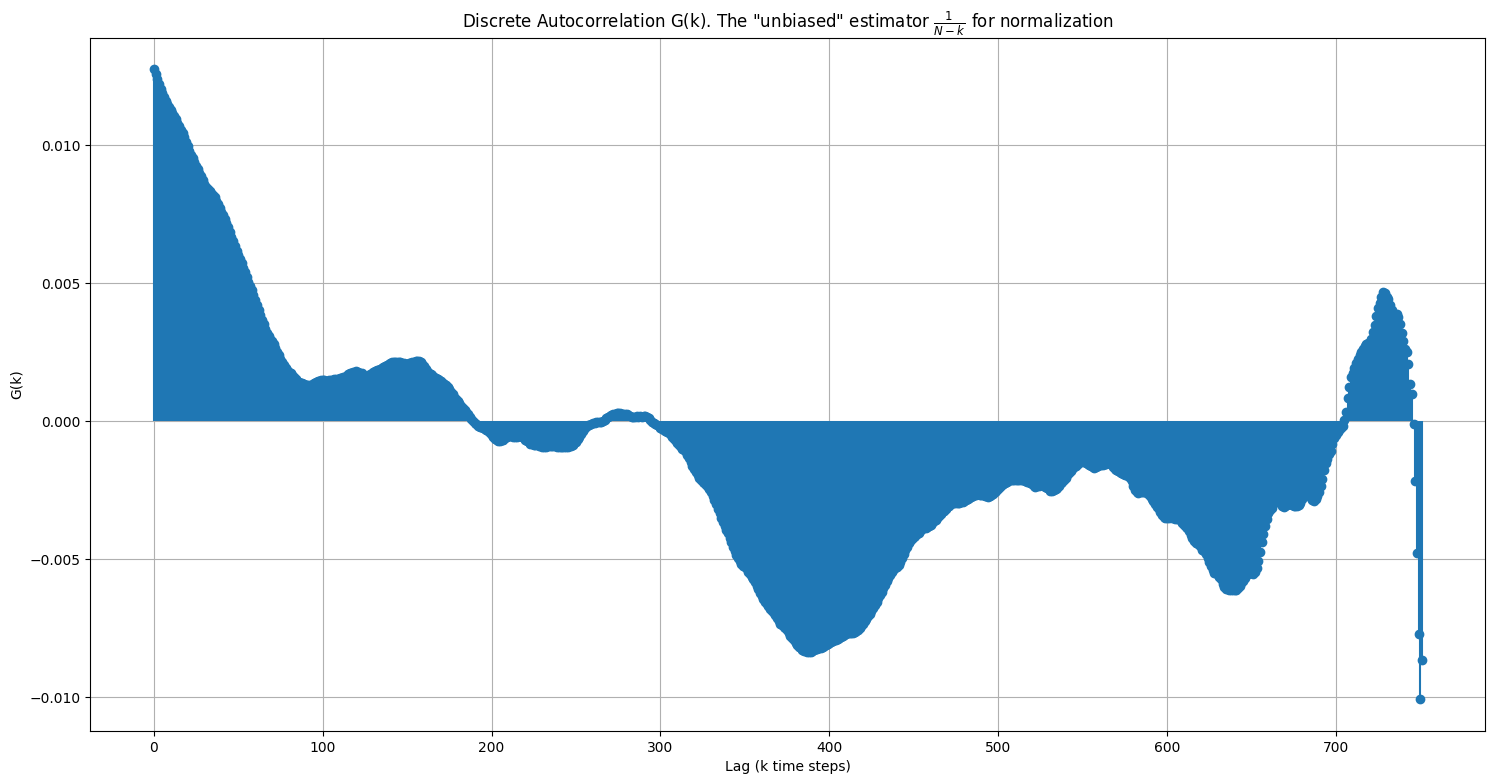

In [30]:
# --- Example with full lags ---
autocorr_full = calculate_autocorrelation_G(df=df_detrending, value_column="AAPL", normalization="unbiased")  # max_lag=None by default, changed value_column
# Plot the results
plt.figure(figsize=(18, 9))
plt.stem(autocorr_full.index, autocorr_full.values, basefmt=" ")
plt.xlabel("Lag (k time steps)")
plt.ylabel("G(k)")
plt.title(r'Discrete Autocorrelation G(k). The "unbiased" estimator $\frac{1}{N - k}$ for normalization')
plt.grid(True)
plt.show()

# 3. Using a Ready-Made Autocorrelation Function  
It maybe useful to use a standard library implementation of the autocorrelation function.  
**TODO:** Use `statsmodels.tsa.stattools.acf` from the `statsmodels` package.

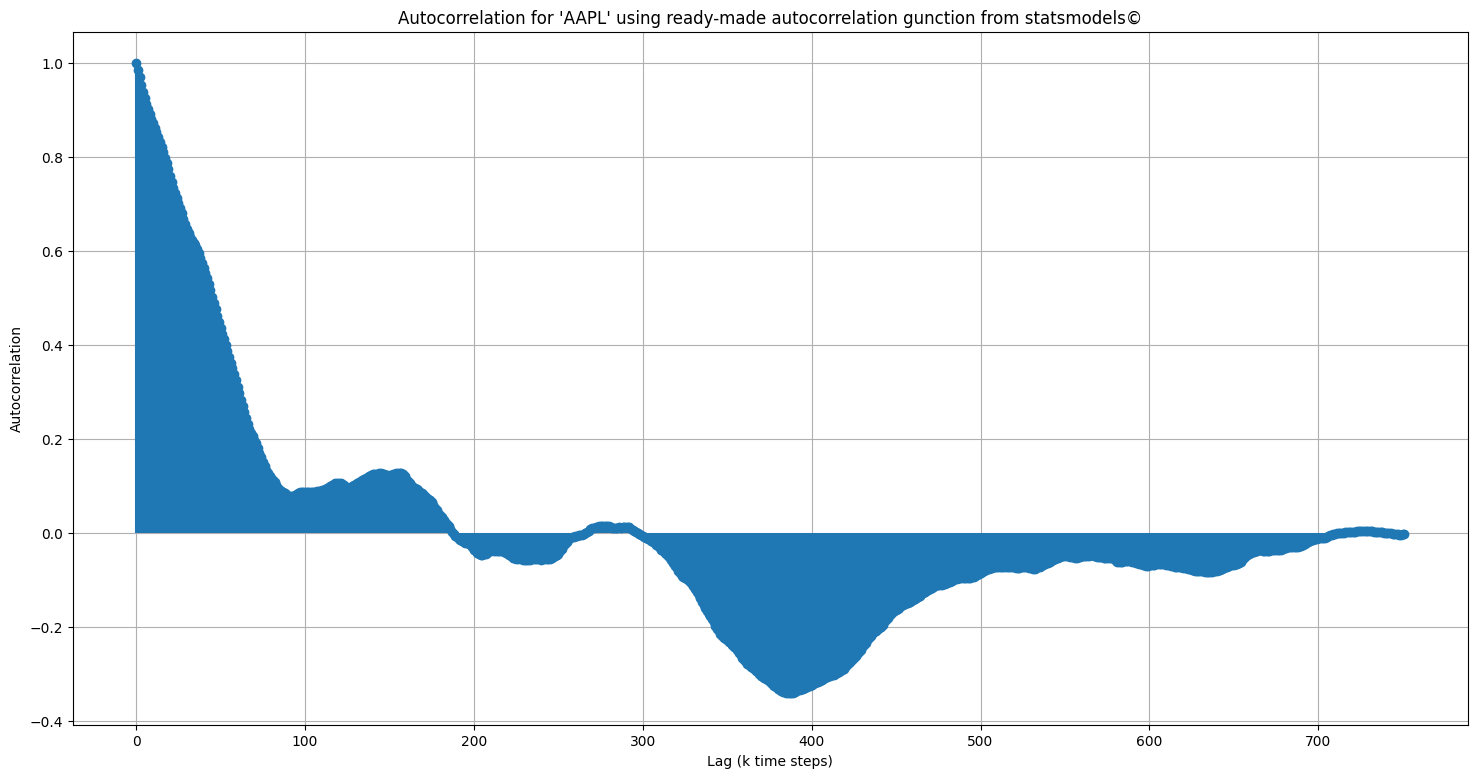

In [31]:
# Calculate autocorrelation using statsmodels
acf_values = sm.tsa.stattools.acf(df_detrending["AAPL"], nlags=len(df) - 1, fft=True, missing='conservative')

# Plot the autocorrelation
plt.figure(figsize=(18, 9))
plt.stem(range(len(acf_values)), acf_values, basefmt=" ")
plt.xlabel("Lag (k time steps)")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation for 'AAPL' using ready-made autocorrelation gunction from statsmodels©")
plt.grid(True)
plt.show()

The difference in results between `calculate_autocorrelation_G` and `sm.tsa.stattools.acf` arises from the way the autocorrelation is calculated and normalized in each method:


1. `calculate_autocorrelation_G`:


- This function implements a manual calculation of the autocorrelation function `G(k)` based on the formula: $G(k) = \frac{1}{N} \sum_{n=k}^{N-1} f(n) \cdot f(n-k)$
- It does not subtract the **mean** of the time series before calculating the autocorrelation. This means the raw values of the series are used directly, which can lead to different results if the series has a non-zero mean.
- The normalization is done by dividing by $N$ (the total number of data points), which is consistent with the formula provided in the function's docstring.

2.   `sm.tsa.stattools.acf`:


- This function calculates the **autocorrelation coefficient**, which is normalized by the variance of the series. It subtracts the mean of the series before performing the calculation.
- The formula used is: $\text{ACF}(k) = \frac{\sum_{n=k}^{N-1} (f(n) - \bar{f}) \cdot (f(n-k) - \bar{f})}{\sum_{n=0}^{N-1} (f(n) - \bar{f})^2}$ where $\bar{f}$ is the mean of the series.
- This normalization ensures that the autocorrelation values are bounded between -1 and 1.

## Key Differences:
- **Mean subtraction**: `sm.tsa.stattools.acf` subtracts the mean, while `calculate_autocorrelation_G` does not.
- **Normalization**: `sm.tsa.stattools.acf` normalizes by the variance, while `calculate_autocorrelation_G` normalizes by $N$.
- **Interpretation**: The results from `calculate_autocorrelation_G` represent the raw autocorrelation values $G(k)$, while `sm.tsa.stattools.acf` provides the autocorrelation coefficients, which are standardized.

## Impact:
If the time series has a non-zero mean or significant variance, the results from the two methods will differ. The `sm.tsa.stattools.acf` method is more commonly used in statistical analysis because it provides a standardized measure of autocorrelation.

[comment]: https://wiki.loginom.ru/articles/acf.html
-----------

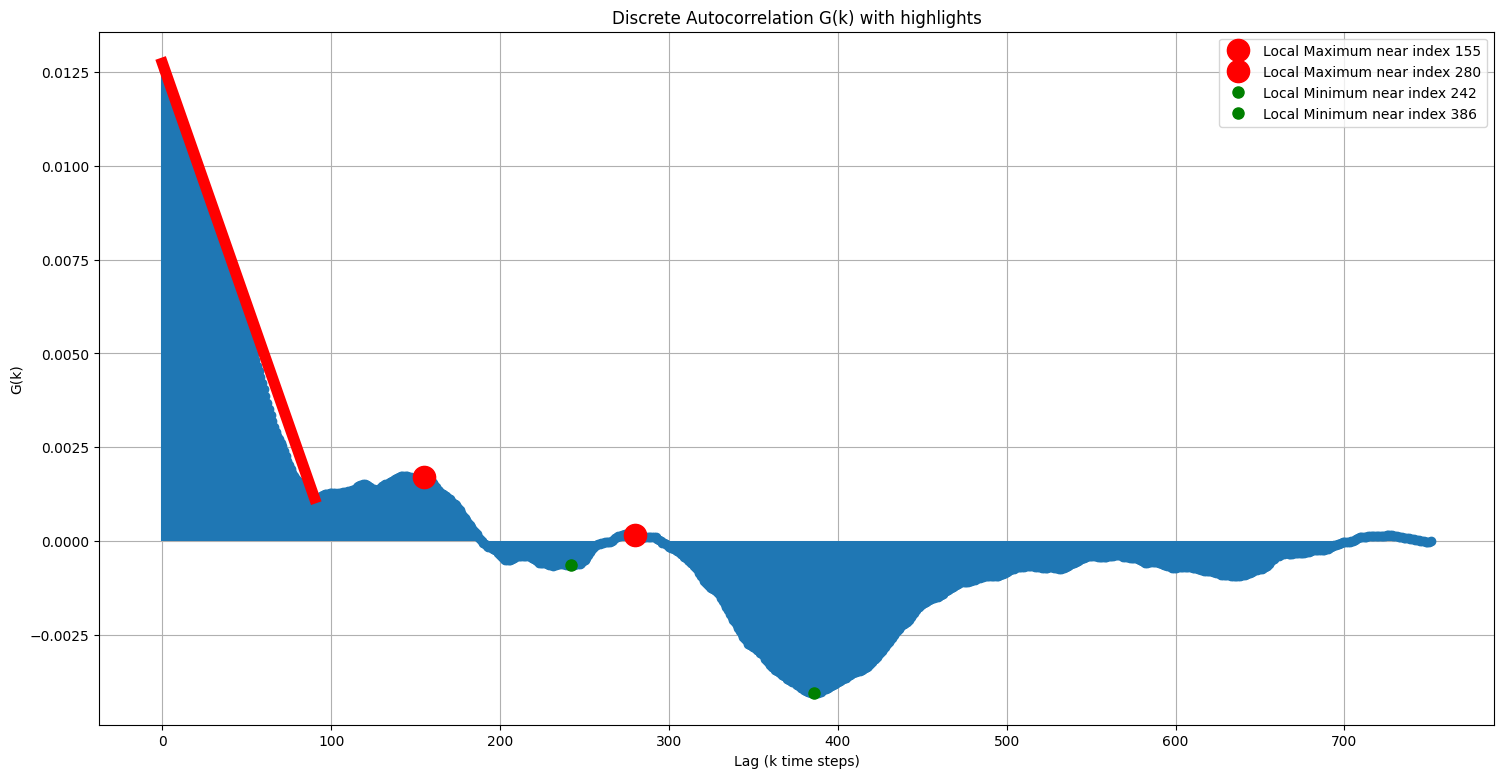

In [32]:
autocorr_full = calculate_autocorrelation_G(df=df_detrending, value_column="AAPL", normalization="biased")  # max_lag=None by default, changed value_column
# autocorr_full = pandas.Series(data=acf_values, index=range(len(acf_values)))

# Find the indices for local maximum and minimum
local_maximum_index_1 = np.argmax(autocorr_full[150:170]) + 150  # Adjust the range as needed
local_maximum_index_2 = np.argmax(autocorr_full[280:320]) + 280  # Adjust the range as needed

local_minimum_index_1 = np.argmin(autocorr_full[240:260]) + 240  # Adjust the range as needed
local_minimum_index_2 = np.argmin(autocorr_full[370:390]) + 370 # Adjust the range as needed

# Plot the autocorrelation function
plt.figure(figsize=(18, 9))
plt.stem(autocorr_full.index, autocorr_full.values, basefmt=" ")

# Plot the linear trend
x = np.arange(0, 91)
y = np.linspace(start=autocorr_full[0], stop=autocorr_full[91-1], num=91)
plt.plot(x,y, color='red', linewidth=8)


# Highlight the points
plt.plot(local_maximum_index_1, autocorr_full[local_maximum_index_1], 'ro', markersize=16, label=f"Local Maximum near index {local_maximum_index_1}")
plt.plot(local_maximum_index_2, autocorr_full[local_maximum_index_2], 'ro', markersize=16, label=f"Local Maximum near index {local_maximum_index_2}")

plt.plot(local_minimum_index_1, autocorr_full[local_minimum_index_1], 'go', markersize=8, label=f"Local Minimum near index {local_minimum_index_1}")
plt.plot(local_minimum_index_2, autocorr_full[local_minimum_index_2], 'go', markersize=8, label=f"Local Minimum near index {local_minimum_index_2}")


plt.xlabel("Lag (k time steps)")
plt.ylabel("G(k)")
plt.title(r'Discrete Autocorrelation G(k) with highlights')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

1. **Strong Linear Autocorrelation (up to Lag 84):**  
   There is a clear linear component in the autocorrelation function, starting from the origin and extending up to lag 84 (which corresponds to approximately 4 months).  
   **Interpretation:** This suggests that values from the past 4 months significantly influence tomorrow’s value.  
   *(To strengthen this claim, a statistical test or literature reference would be helpful.)*

2. **Cyclic Patterns Identified:**  
   The autocorrelation function exhibits local maxima at lags around 156 (approximately half a year) and 297 (roughly one year).  
   **Interpretation:** This indicates the presence of a cyclic or seasonal component in the time series with semi-annual and annual periodicity.  
   *(Further validation through spectral analysis or referencing known seasonal behaviors in financial data is recommended.)*

[comment]: https://en.wikipedia.org/wiki/Central_moment

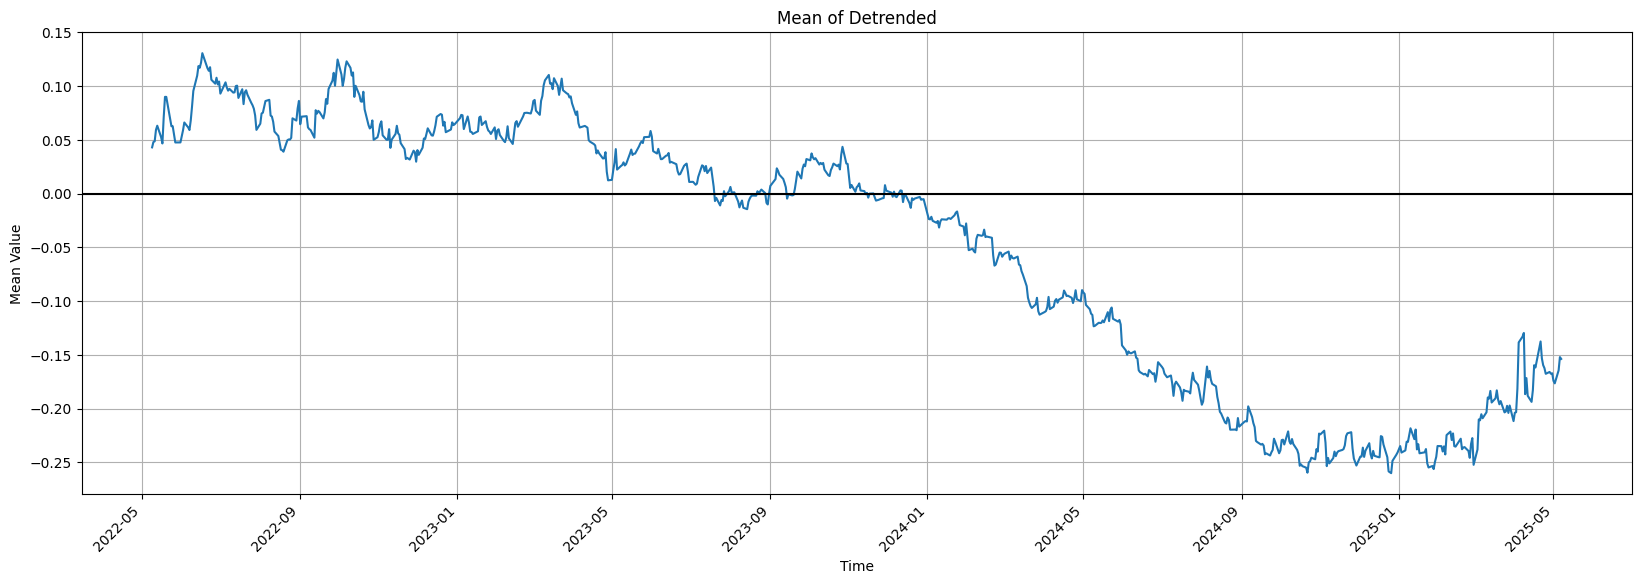

In [33]:
# Calculate the mean
mean_of_stocks = df_detrending.mean(axis=1)

# Plot the mean_of_stocks
plt.figure(figsize=(20, 6))
plt.plot(mean_of_stocks.index, mean_of_stocks.values)
plt.xlabel("Time")
plt.ylabel("Mean Value")
plt.title("Mean of Detrended")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='-')# Add main horizontal line at y=0
plt.show()


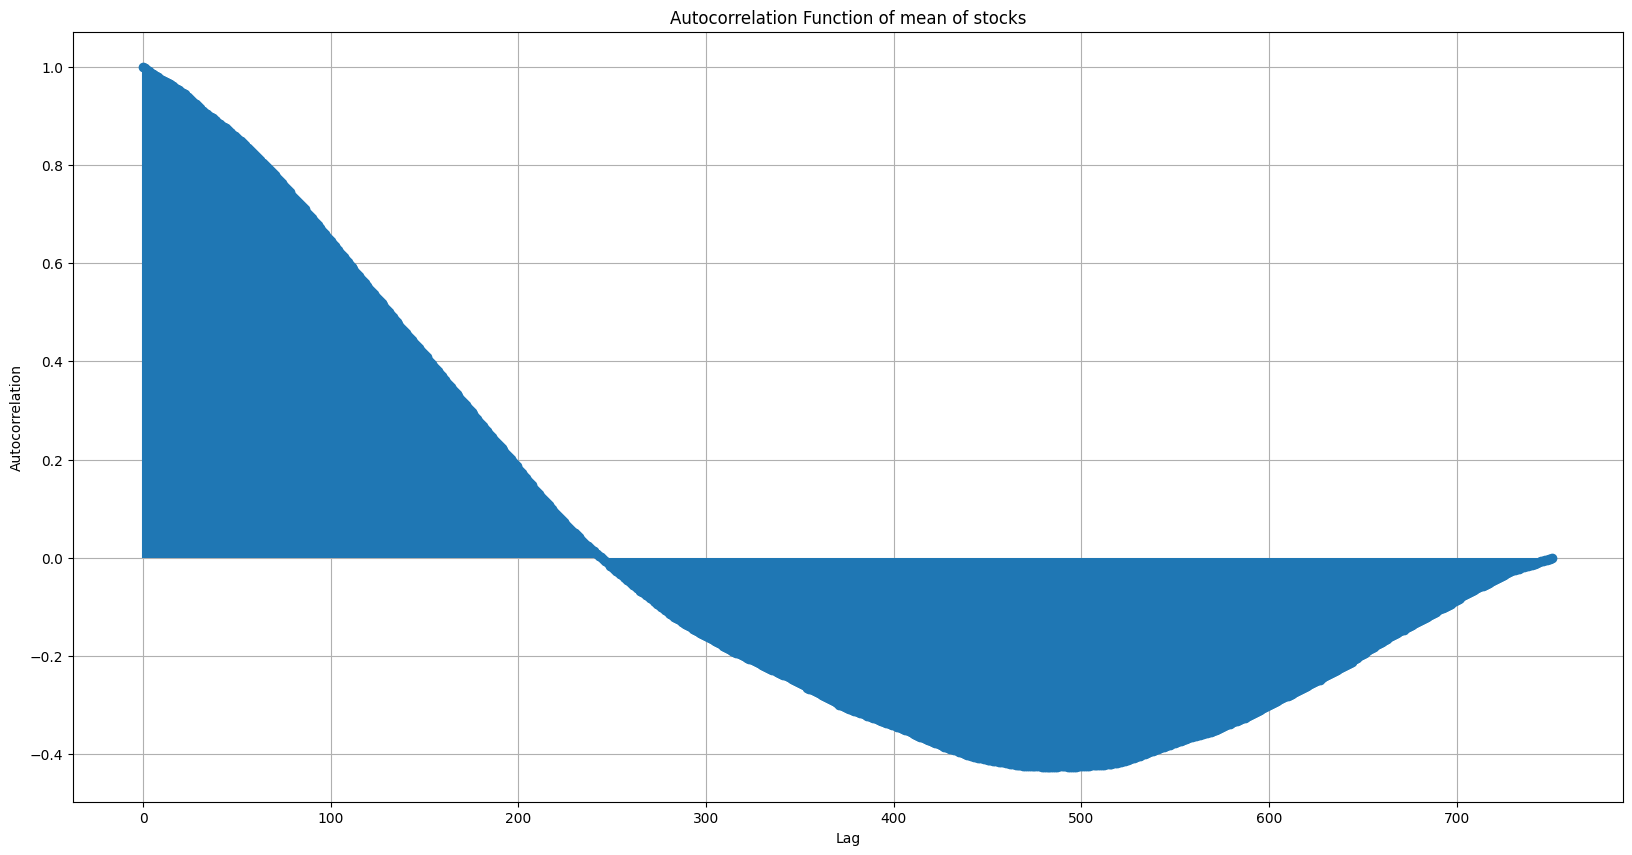

In [34]:
# Calculate autocorrelation using statsmodels
acf_values = sm.tsa.stattools.acf(mean_of_stocks, nlags=len(mean_of_stocks) - 1,  missing='conservative')

# Plot the autocorrelation
plt.figure(figsize=(20, 10))
plt.stem(range(len(acf_values)), acf_values, basefmt=" ")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of mean of stocks")
plt.grid(True)
plt.show()


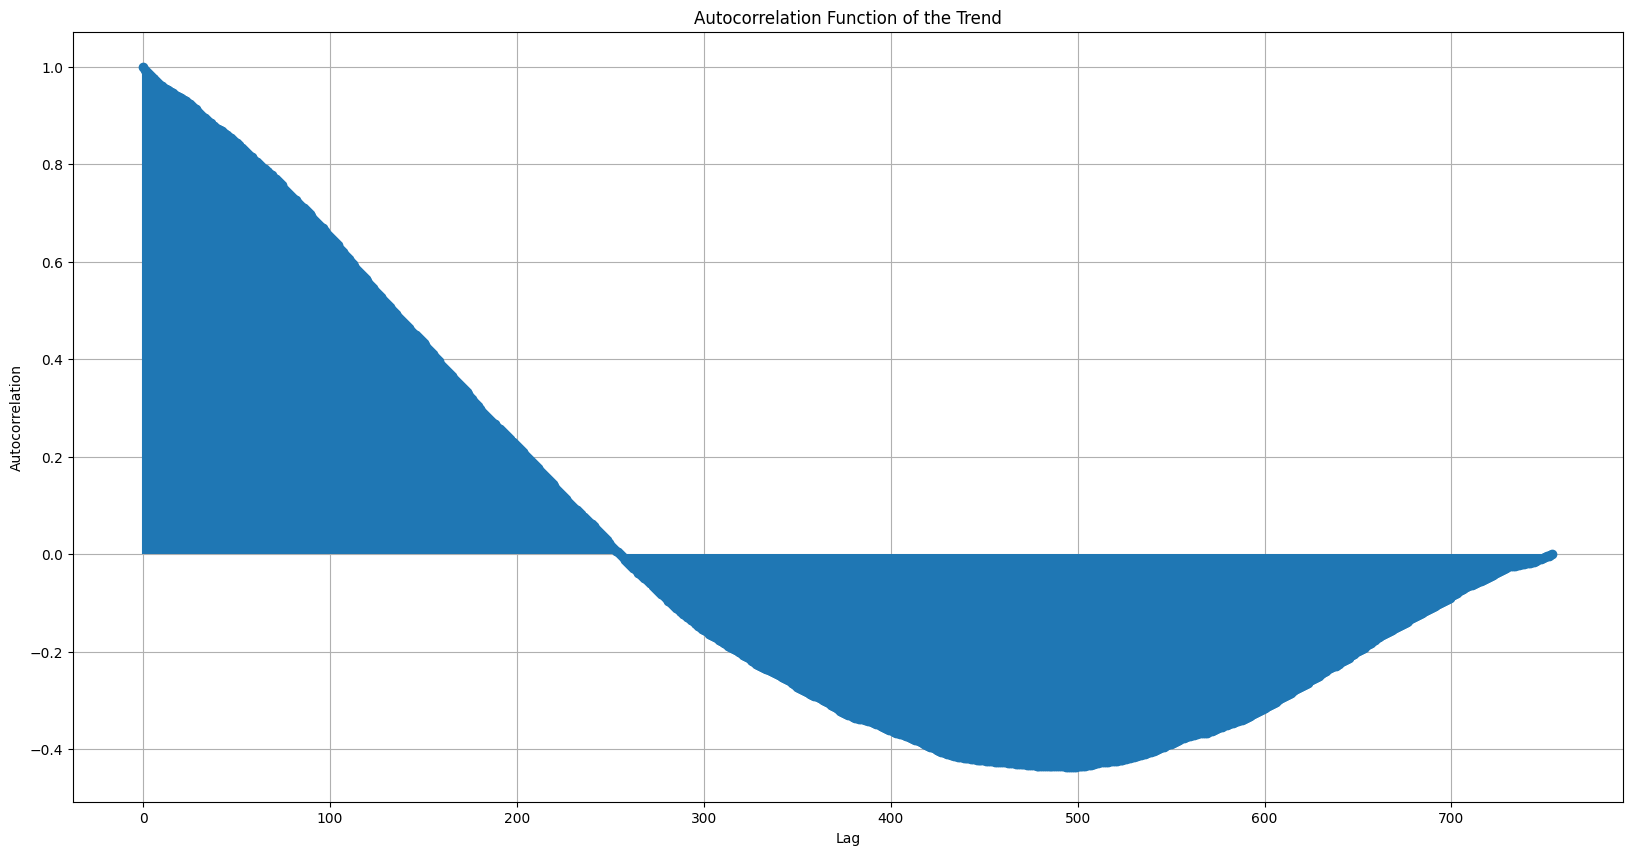

In [35]:
# Calculate autocorrelation using statsmodels
acf_values = sm.tsa.stattools.acf(trend, nlags=len(trend) - 1,  missing='conservative')

# Plot the autocorrelation
plt.figure(figsize=(20, 10))
plt.stem(range(len(acf_values)), acf_values, basefmt=" ")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function of the Trend")
plt.grid(True)
plt.show()

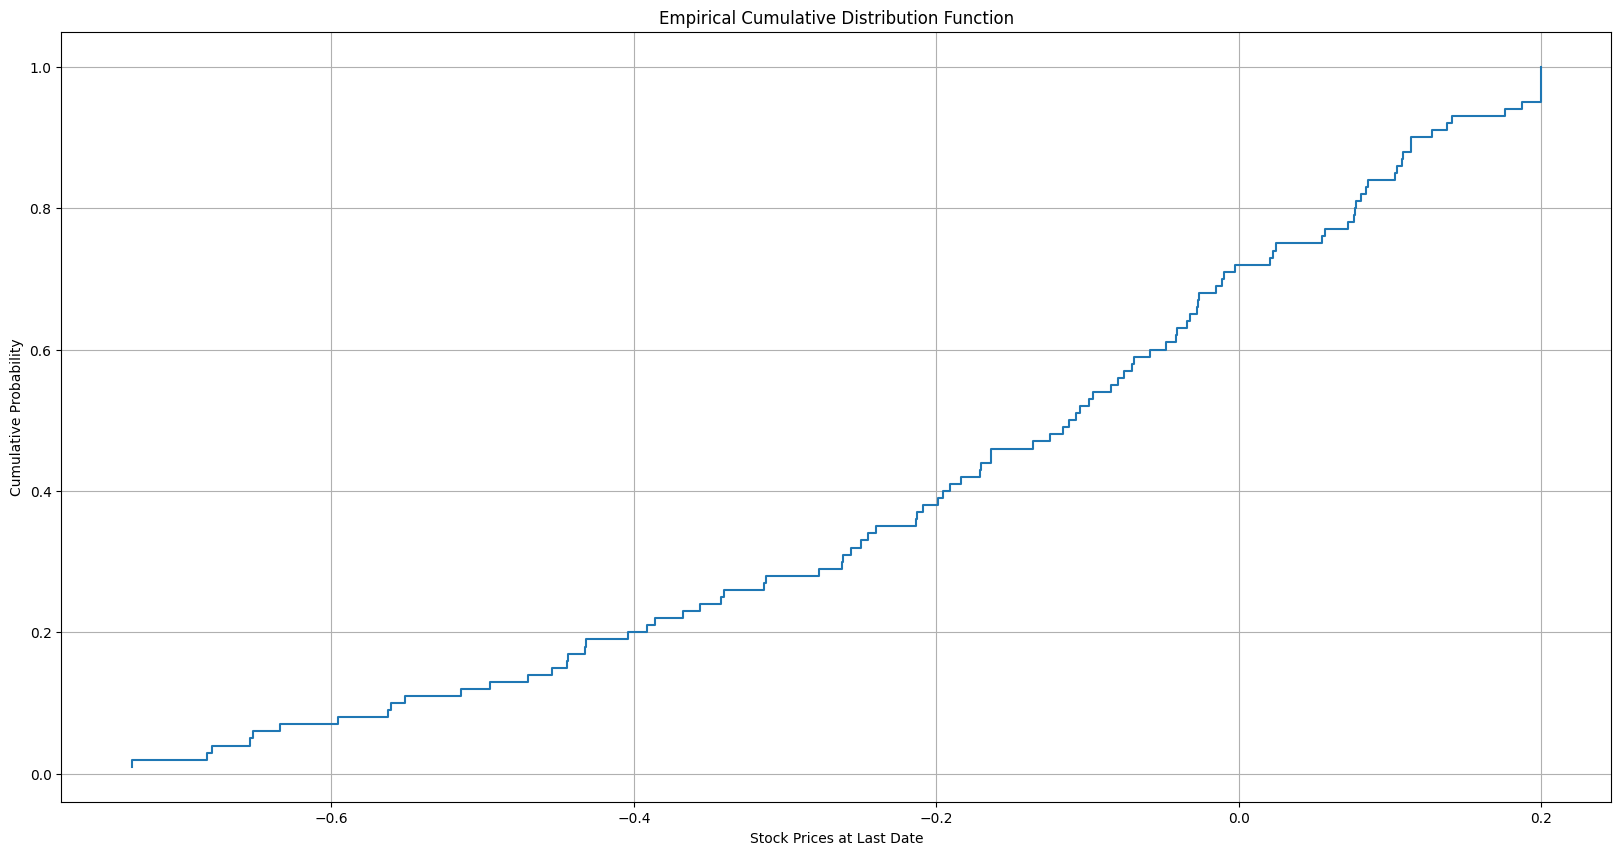

In [36]:
import matplotlib.pyplot as plt
import numpy as np

last_date_prices = df_detrending.iloc[-1]

# Sort the prices
sorted_prices = np.sort(last_date_prices)

# Calculate the CDF
n = len(sorted_prices)
cdf_values = np.arange(start=1, stop=n+1) / n

# Plot the empirical CDF
plt.figure(figsize=(20, 10))
plt.step(sorted_prices, cdf_values)
plt.xlabel('Stock Prices at Last Date')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function')
plt.grid(True)
plt.show()


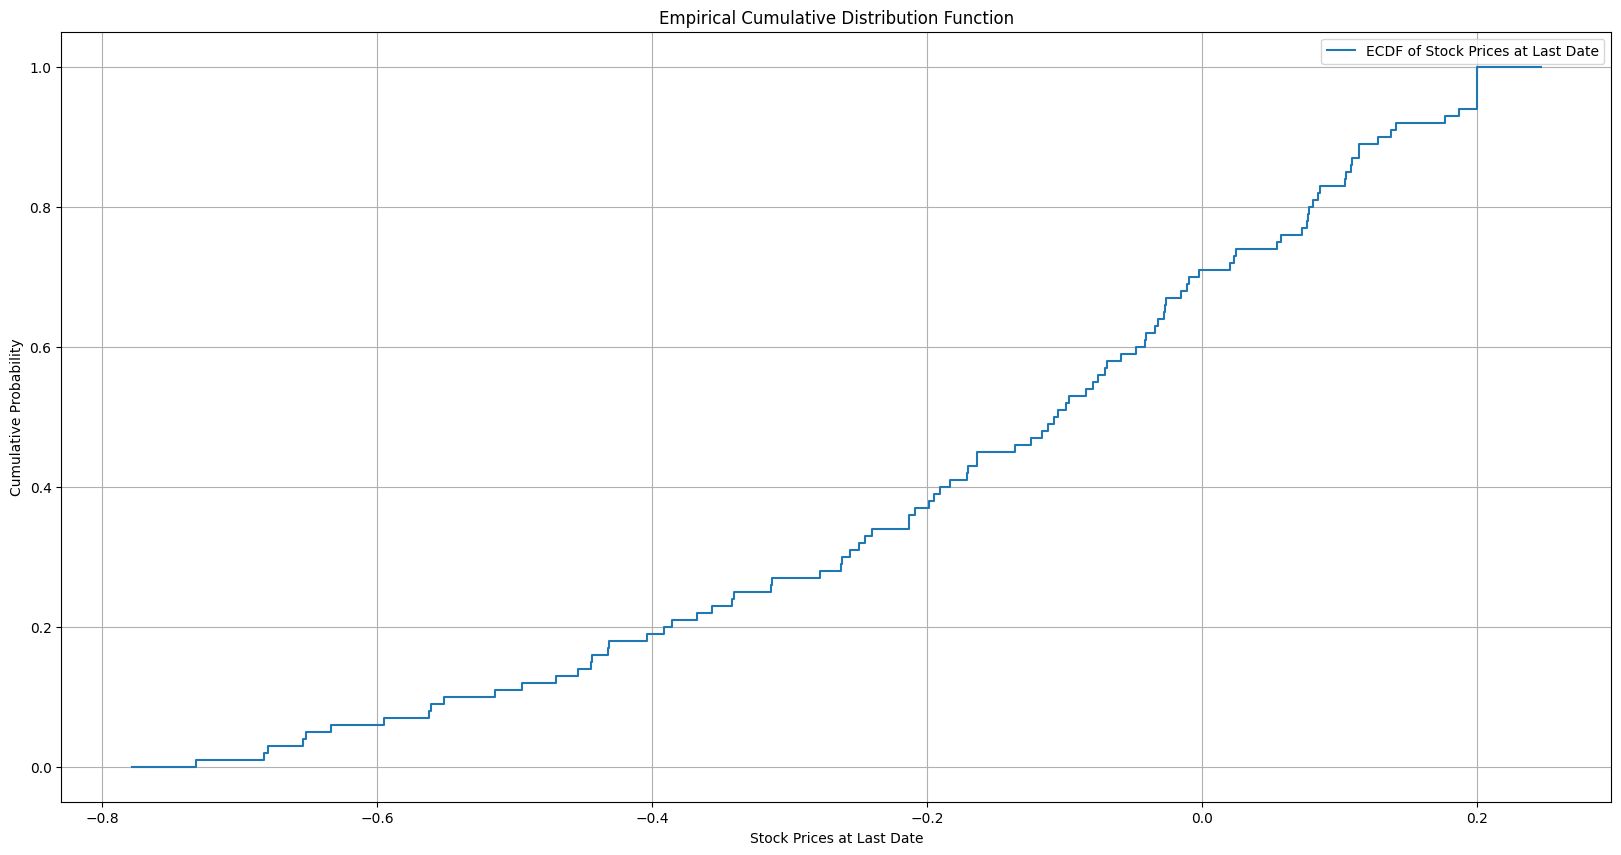

In [37]:
import matplotlib.pyplot as plt
from scipy.stats import ecdf

sample = df_detrending.iloc[-1]

# Calculate the ECDF
res = ecdf(sample)

# Plot the ECDF
plt.figure(figsize=(20, 10))
res.cdf.plot(label='ECDF of Stock Prices at Last Date')

plt.xlabel('Stock Prices at Last Date')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution Function')
plt.legend()
plt.grid(True)
plt.show()


------------------------
#6. Try to use Langevin equation

https://en.wikipedia.org/wiki/Langevin_equation

How?

Some comment: "Another comment is the cyclic nature of the data due to, e.g., option expiration, earnings reports, and a few other things. This limits a study based on Langevin equation, as the process is not continuous. A neural net model would be more appropriate and practical."

#7. Try to use the $\frac{dM_i}{dt} = γ(t, M_i) +A(t)*ξ(t)$ model.

How? Why?

#8. Try to use Martingale representation theorem

https://en.wikipedia.org/wiki/Martingale_representation_theorem

# 9.  Try "Black-Scholes model"

https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model

## 9.1. Take a logarithm of price

Comment: "You should take a logarithm of price, to follow the established wisdom of Black-Scholes model. Since the model is used to price options and other derivatives, it governs the markets regardless  of it being "true".

## 9.2. Check "Geometric Brownian motion"
https://en.wikipedia.org/wiki/Geometric_Brownian_motion